# EDA Cluster proyect using ChatGPT

Here's an overall plan:

### Step 1: Data Loading

    Load the dataset from the CSV file into a pandas DataFrame.

### Step 2: Data Inspection

    Check the basic information about the dataset, such as the number of rows and columns, data types, and
    missing values.

### Step 3: Data Cleaning

    Handle any missing values, if present.
    Check for duplicate rows and remove them, if necessary.
    Check for outliers and decide whether to handle them or not.

### Step 4: Data Exploration

    Calculate and visualize summary statistics (mean, median, standard deviation, etc.) for numerical columns.
    Explore categorical columns (in this case, "country").
    Create histograms, box plots, and scatter plots to visualize the distribution and relationships between
    variables.

### Step 5: Feature Engineering (if needed)

    Create new features or transform existing ones to improve model performance.

### Step 6: Data Visualization

    Create meaningful visualizations to gain insights into the data.
    Explore correlations between variables.

### Step 7: Data Preparation

    Prepare the data for modeling by encoding categorical variables, scaling numerical features, and splitting
    the dataset into training and testing sets.

### Step 8: Initial Modeling (if applicable)

    If your goal is to build predictive models, you can start with initial modeling and evaluate model
    performance.

### Step 9: Further Analysis

    Perform any additional analyses or investigations as needed based on the insights gained during EDA.

# Step 1:

Let's begin downloading some necessary libraries (if you haven't done it yet).

In [1]:
!pip install pandas

In [2]:
!pip install scikit-learn

Now, let's load the dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Country-data.csv')

# Display the first few rows of the dataset to get an overview
df.head()


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

# Step 2 and 3:

In this step we're going to check the basic information about the dataset and we'll handle missing values, check for duplicate rows, and decide whether to handle outliers or not.

In [3]:
# Check the basic information about the dataset
df.info()

# Check the number of missing values in each column
missing_values = df.isnull().sum()
print("\nMissing value list:", missing_values)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the number of duplicate rows
print("\nNumber of duplicate rows:",len(duplicate_rows))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

Missing value list: country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Number of duplicate rows: 0


In the next box the code identifies the categorical columns that will not be taken into account on the Outlier Detection.

In [4]:
# Identify categorical columns (non-numeric columns)
categorical_cols = df.select_dtypes(include=['object']).columns
# Explore each categorical column
for col in categorical_cols:
    unique_values = df[col].unique()
    num_unique_values = len(unique_values)
    
    print(f"Column: {col}")
    print(f"Number of unique values: {num_unique_values}")
    print(f"Unique values: {unique_values}")
    print("\n")

Column: country
Number of unique values: 167
Unique values: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrg

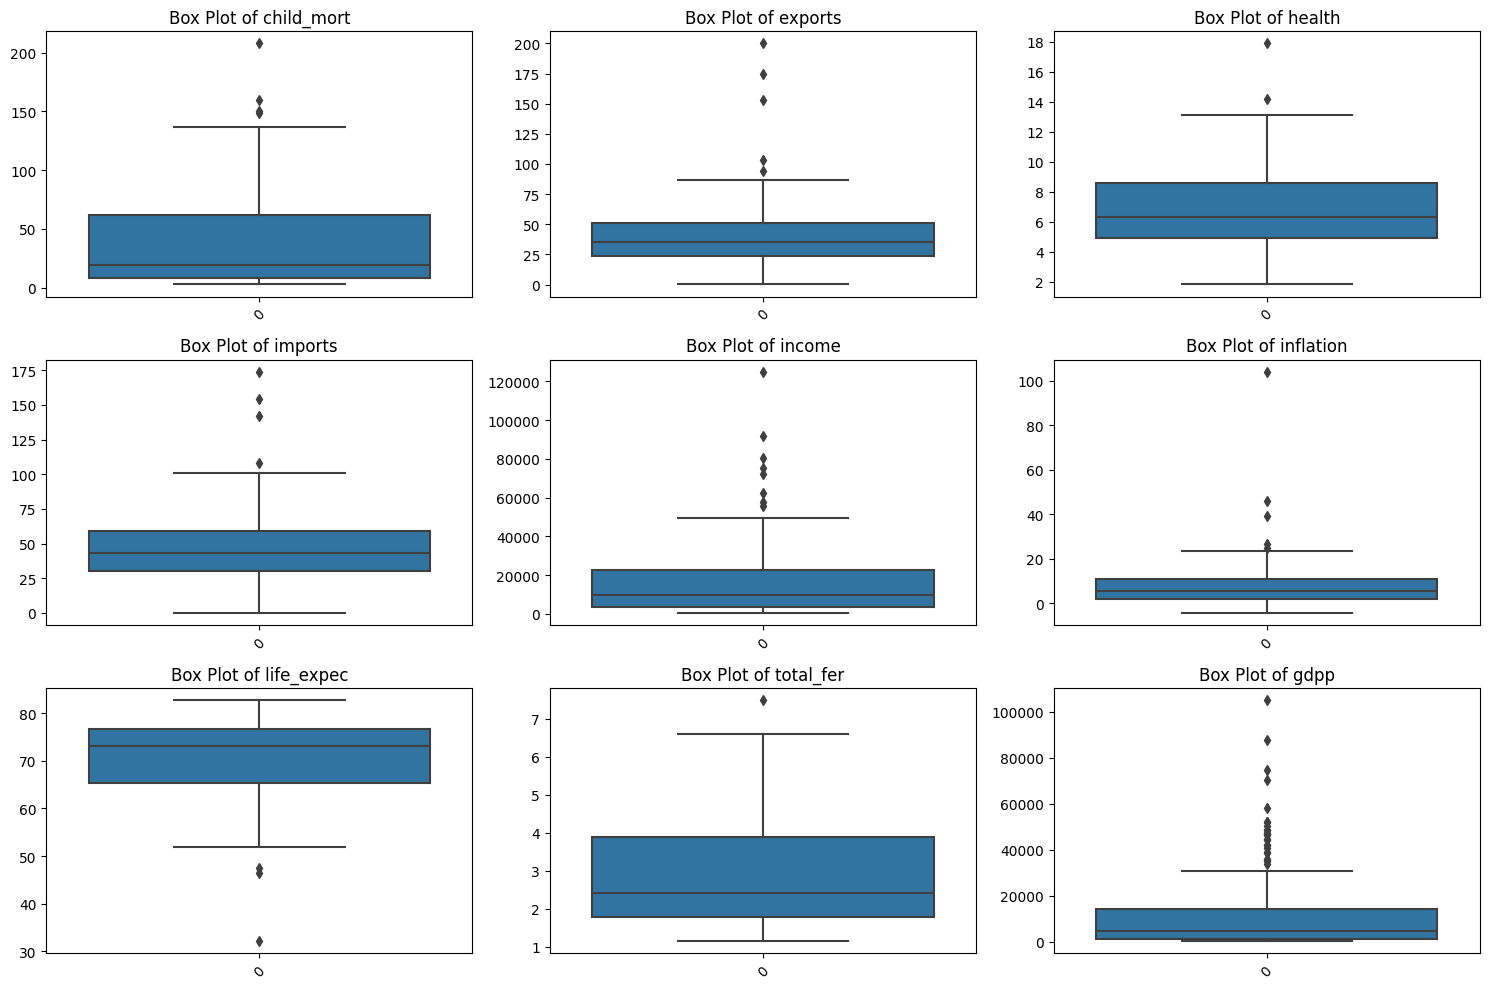

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns for outlier detection
numerical_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Create separate box plots for each numerical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Create subplots in a 3x3 grid
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


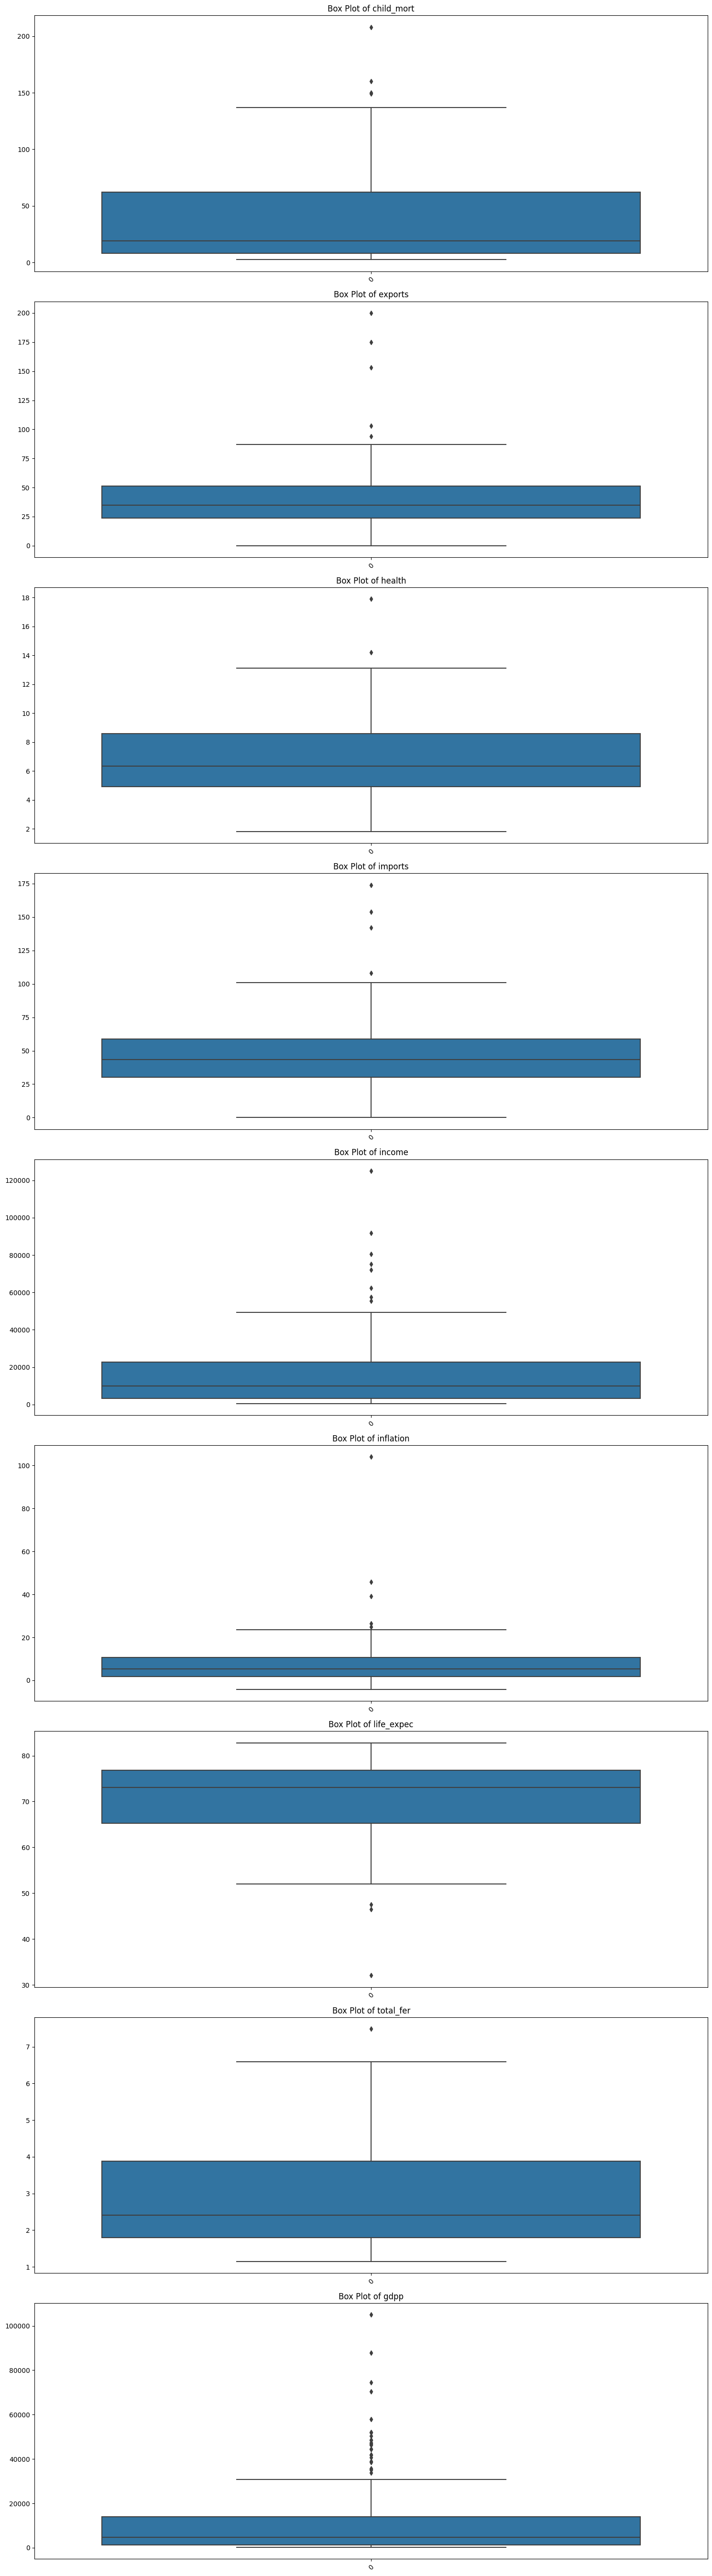

In [6]:
# Select numerical columns dynamically (exclude non-numeric columns)
numerical_cols = df.select_dtypes(include=['number']).columns

# Create separate box plots for each numerical column
plt.figure(figsize=(15, 6 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Box plots are a common visualization tool for detecting outliers in a dataset. They provide a summary of the distribution of data and highlight potential outliers. Here's how box plot outlier detection works and what conclusions you can draw from them:

#### Box Plot Components:
##### Box:
The box in the plot represents the interquartile range (IQR), which is the middle 50% of the data. It is divided into two parts: the lower quartile (Q1) and the upper quartile (Q3). The length of the box is the IQR, and it spans from Q1 to Q3.

##### Whiskers:
Whiskers extend from the edges of the box to indicate the range of the data. Typically, the whiskers extend to a maximum of 1.5 times the IQR from either Q1 or Q3. Any data points beyond the whiskers are considered potential outliers.

##### Outliers:
Individual data points that fall beyond the whiskers are marked as individual points. These points are considered potential outliers.

#### Interpreting Box Plots:

##### Median (Q2):
The line inside the box represents the median, which is the middle value of the dataset. It provides a measure of central tendency.

##### IQR:
The box's length (from Q1 to Q3) represents the IQR, which is a measure of data dispersion. It contains the central 50% of the data.

### Conclusions from Box Plots:

##### Outlier Identification:
Box plots help identify potential outliers in the data. Data points beyond the whiskers are considered potential outliers. These are values that significantly deviate from the majority of the data.

##### Skewness:
The direction of skewness can be observed. If the right whisker (upper whisker) is significantly longer than the left one (lower whisker), it indicates positive skewness (right-skewed data). If the left whisker is longer, it indicates negative skewness (left-skewed data).

##### Central Tendency:
The median (Q2) provides insight into the data's central tendency. If the median is not in the center of the box, it suggests skewness.

##### Spread:
The length of the box (IQR) shows the spread of the middle 50% of the data. A wider box indicates a larger spread, while a narrower box suggests a smaller spread.

### Interpreting Outliers:

Outliers may be valid data points or errors. It's essential to consider domain knowledge and the context of the data when deciding whether to remove or keep outliers.

# Step 4:

In [7]:
# Calculate summary statistics for numerical columns
summary_stats = df.describe()

# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'Afghanistan'

Correction of the previous code (Considerig only numerical columns)

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

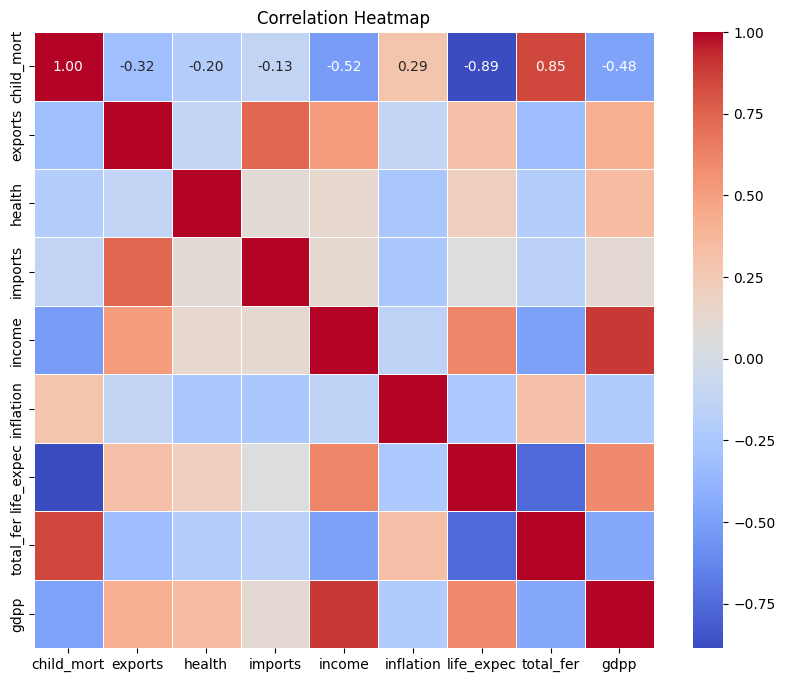

In [9]:
# Calculate summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)

# Exclude non-numeric columns (e.g., 'country') from correlation analysis
numerical_df = df.drop(columns = categorical_cols)

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The correlation matrix presented as a heatmap provides valuable insights into the relationships between numerical variables in your dataset. Each cell in the heatmap represents the correlation coefficient between two variables, and the color intensity indicates the strength and direction of the correlation. Here's what you can interpret from the correlation heatmap:

##### Correlation Coefficient Range:
Positive Correlation: Values close to 1 are shown in shades of red. This indicates that as one variable increases, the other tends to increase as well.
Negative Correlation: Values close to -1 are shown in shades of blue. This indicates that as one variable increases, the other tends to decrease.

##### Strength of Correlation:
The closer the value is to 1 or -1, the stronger the correlation.
Values near 0 suggest a weak or no linear correlation between variables.

##### Interpreting Specific Correlations:
High positive correlation (dark red): Variables move together in the same direction.
High negative correlation (dark blue): Variables move together but in opposite directions.
Near 0 correlation (light colors): Variables have little to no linear relationship.

##### Multicollinearity:
If you see strong positive or negative correlations between multiple pairs of variables, it may indicate multicollinearity. Multicollinearity can be problematic in regression analysis, so it's important to be aware of it.

Keep in mind that correlation does not imply causation. A strong correlation between two variables does not necessarily mean that one causes the other; it only indicates a statistical relationship. Causation should be established through domain knowledge and further analysis.

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


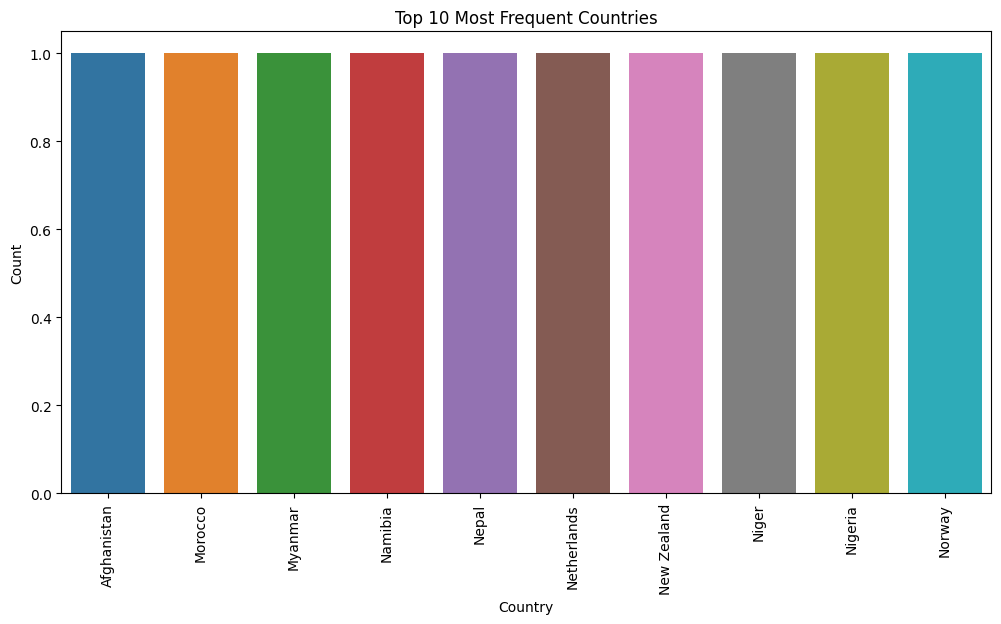

Number of unique countries: 167


In [10]:
# Explore the "country" column (categorical)
country_counts = df['country'].value_counts()
num_unique_countries = len(country_counts)
most_frequent_countries = country_counts.head(10)  # Get the top 10 most frequent countries

# Visualize the distribution of countries (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_frequent_countries.index, y=most_frequent_countries.values)
plt.xticks(rotation=90)
plt.title('Top 10 Most Frequent Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Summary statistics for categorical column
print(f"Number of unique countries: {num_unique_countries}")


# Step 5:

We are going to perform Feature Scaling apllying two methodologies:

Z-score Scaling: Standardization scales features to have a mean of 0 and a standard deviation of 1. It's a good choice when your features have different units or varying scales.

Min-Max Scaling: Min-max scaling scales features to a specified range, usually between 0 and 1. It's suitable when you want to preserve the original range of the data.

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
# Create a copy of the original DataFrame
df_scaled1 = df.copy()
df_scaled2 = df.copy()

# Create a StandardScaler object
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

# Fit and transform the scaler on the numerical columns and update the 'df_scaled' DataFrame
df_scaled1[numerical_cols] = scaler1.fit_transform(df[numerical_cols])
df_scaled2[numerical_cols] = scaler2.fit_transform(df[numerical_cols])
print("Z-score Scaling:")
print(df_scaled1)
print("\nMinMax Scaling:")
print(df_scaled2)

# 'df_scaled' now contains the scaled numerical columns, while 'df' still has the original values


Z-score Scaling:
                 country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_e

# Step 6:

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

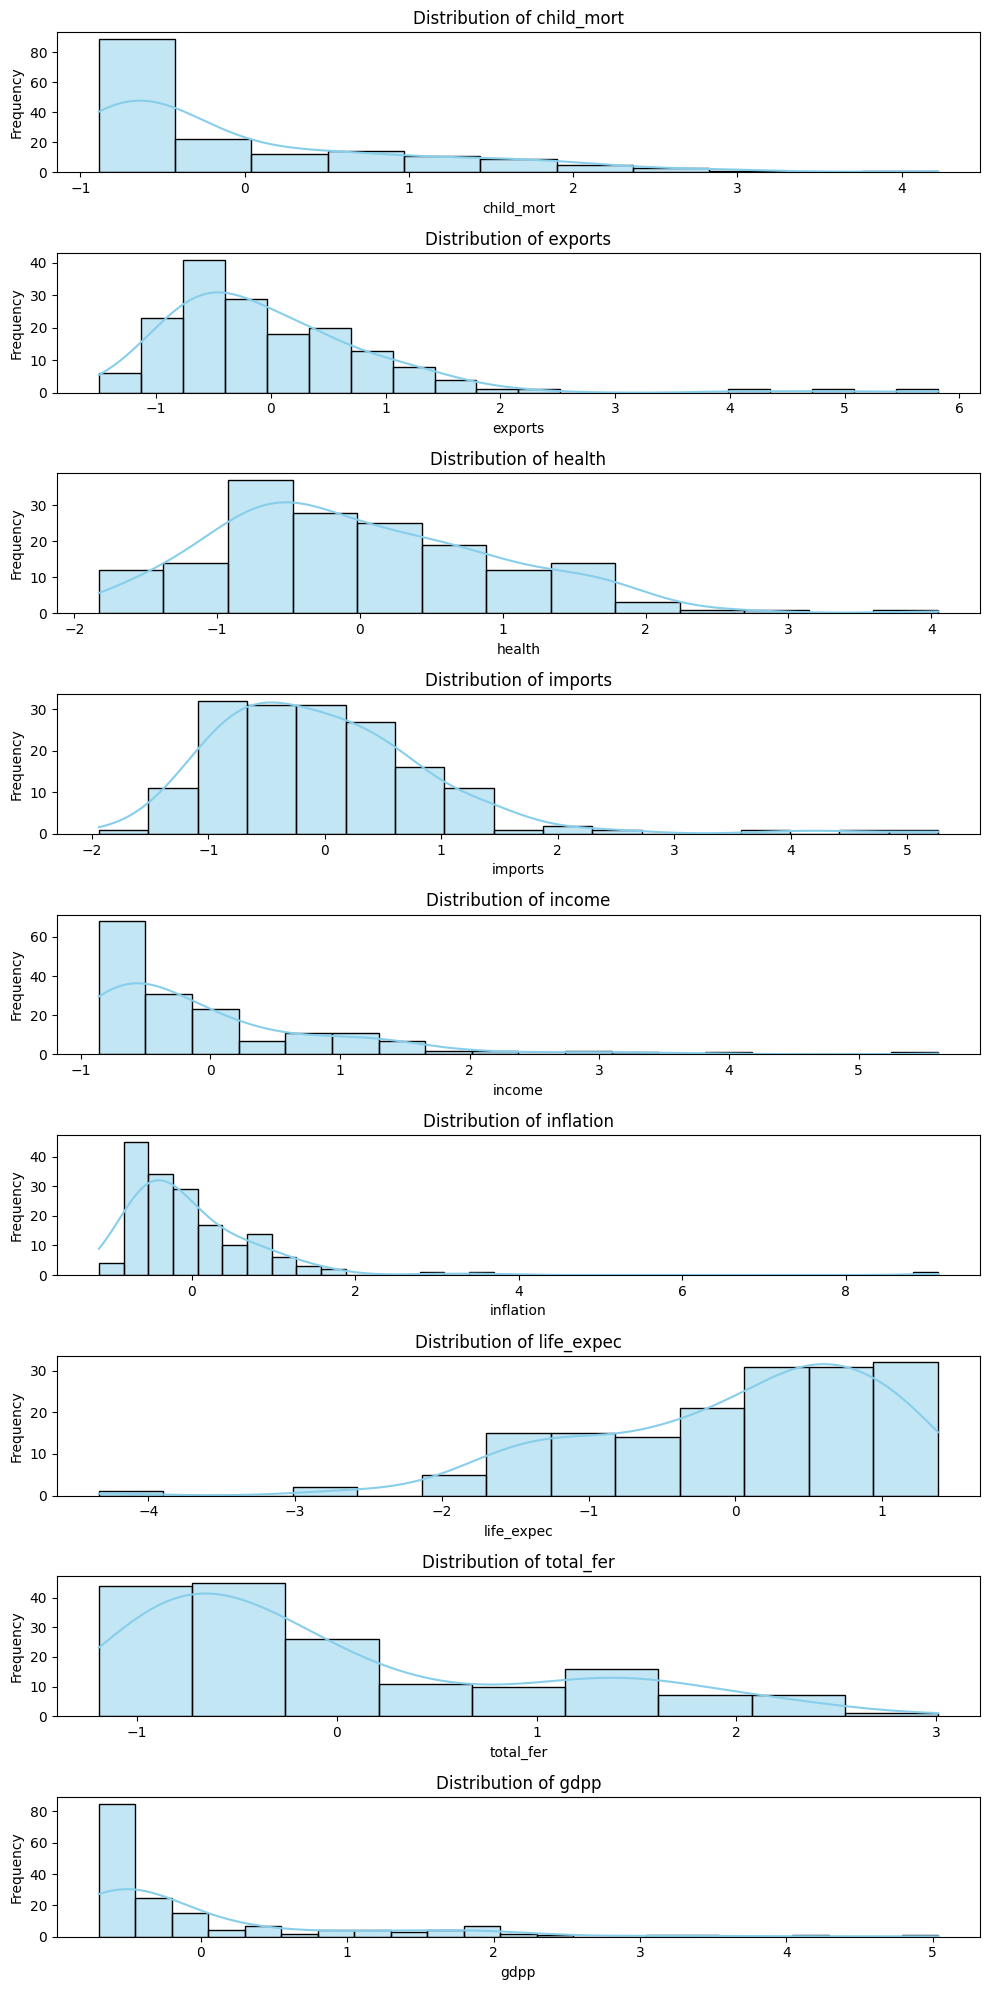

In [13]:
# Set up subplots for each feature
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 20))

# Create histograms for each feature
for i, col in enumerate(numerical_cols):
    sns.histplot(df_scaled1[col], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

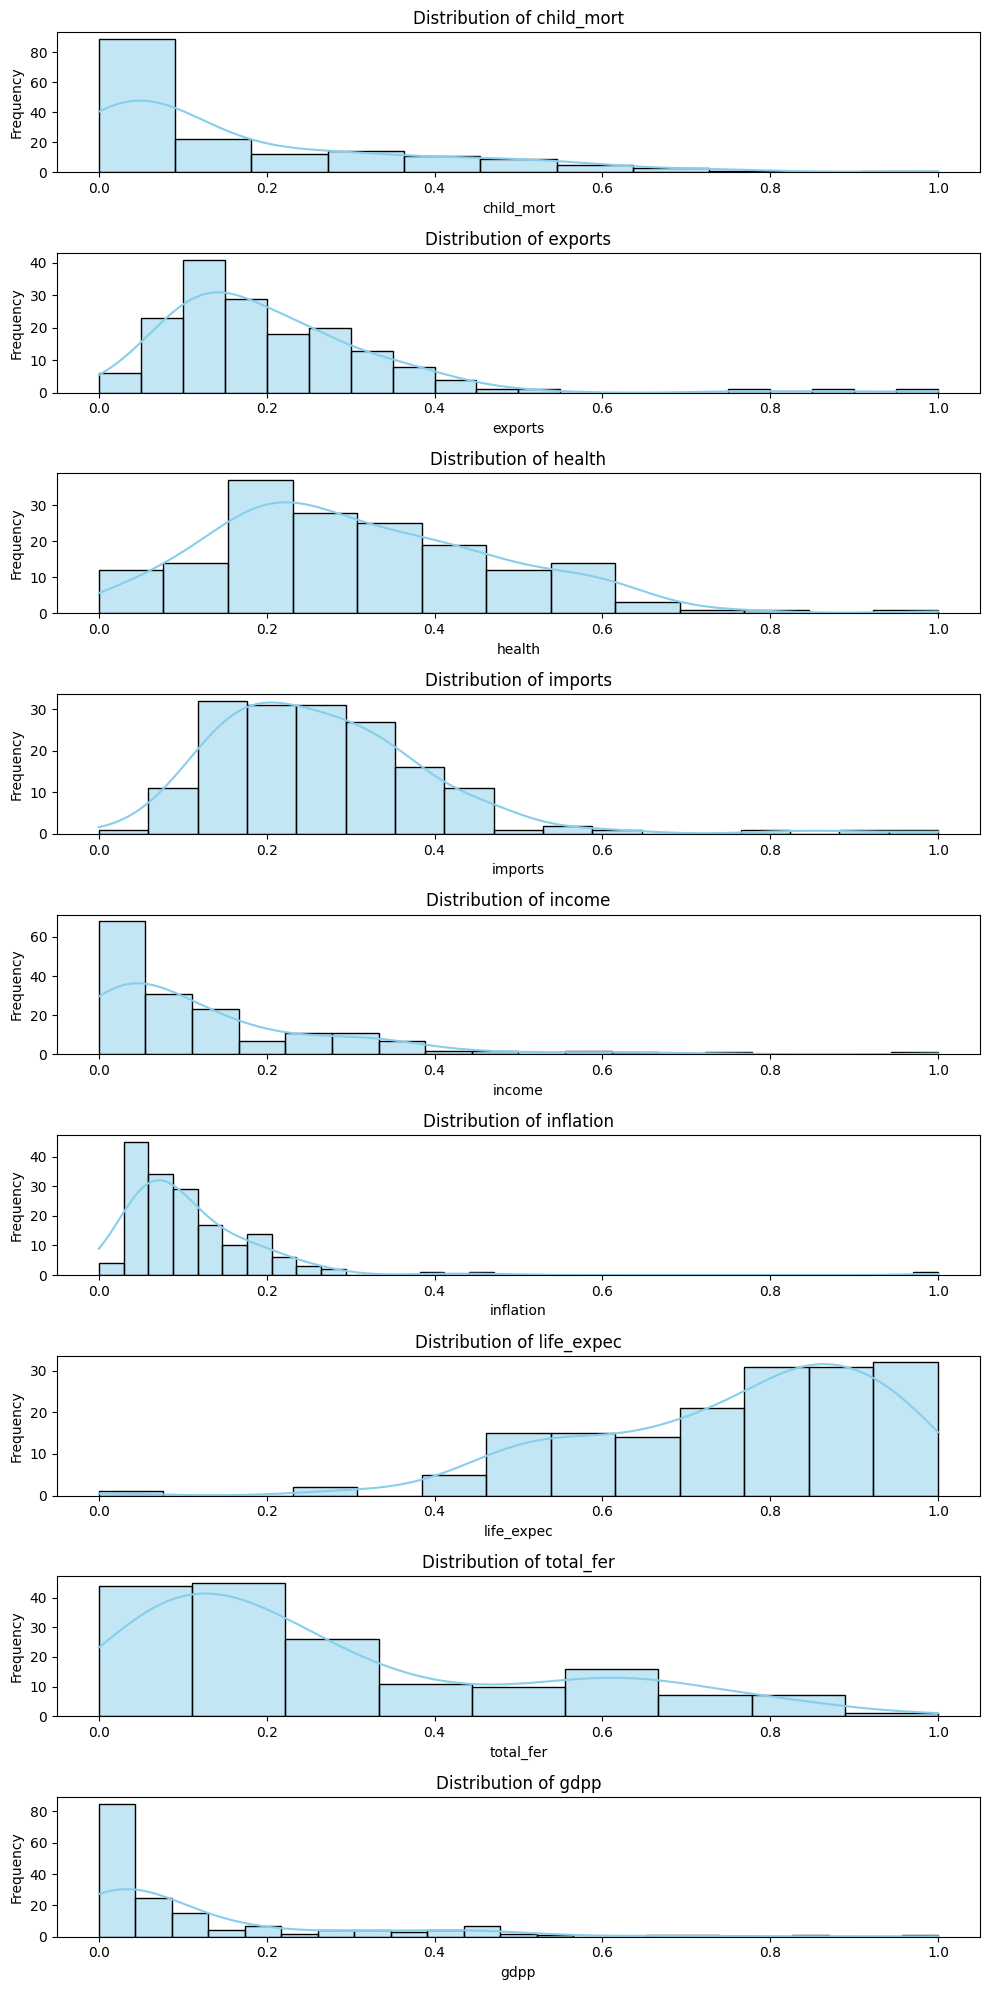

In [14]:
# Set up subplots for each feature
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 20))

# Create histograms for each feature
for i, col in enumerate(numerical_cols):
    sns.histplot(df_scaled2[col], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### Shape of the Distribution:
##### Symmetric:
If the distribution is roughly symmetric, it means that the data is balanced around its center. The mean and median are close.
##### Skewed Left (Negatively Skewed):
If the distribution has a longer tail to the left (negative side), it means that there are some data points with smaller values than the majority. The mean is smaller than the median.
##### Skewed Right (Positively Skewed):
If the distribution has a longer tail to the right (positive side), it means that there are some data points with larger values than the majority. The mean is larger than the median.

#### Center of the Distribution:
##### Mean (Average):
The mean of the distribution represents the central tendency of the data. It's the arithmetic average of all data points.
##### Median:
The median is the middle value when the data is sorted. It's a measure of central tendency that's not affected by extreme outliers.

#### Spread of the Distribution:
##### Standard Deviation:
The standard deviation measures the spread or dispersion of the data. A larger standard deviation indicates more variability.
##### Interquartile Range (IQR):
The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile). It provides a measure of spread that is not influenced by outliers.

#### Peak of the Distribution:
##### Mode:
The mode is the value that appears most frequently in the dataset. A distribution may have one mode (unimodal), multiple modes (multimodal), or no clear mode (uniform).

#### Tails of the Distribution:
##### Tails and Outliers:
The tails of the distribution represent the extreme values in the dataset. Outliers are data points that fall far from the bulk of the data and can affect the shape of the distribution.

#### Kurtosis:
##### Leptokurtic:
If the distribution has higher kurtosis, it means it has heavy tails and more data points clustered around the mean. It indicates more extreme values.
##### Platykurtic:
If the distribution has lower kurtosis, it means it has lighter tails and data points are more spread out.

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

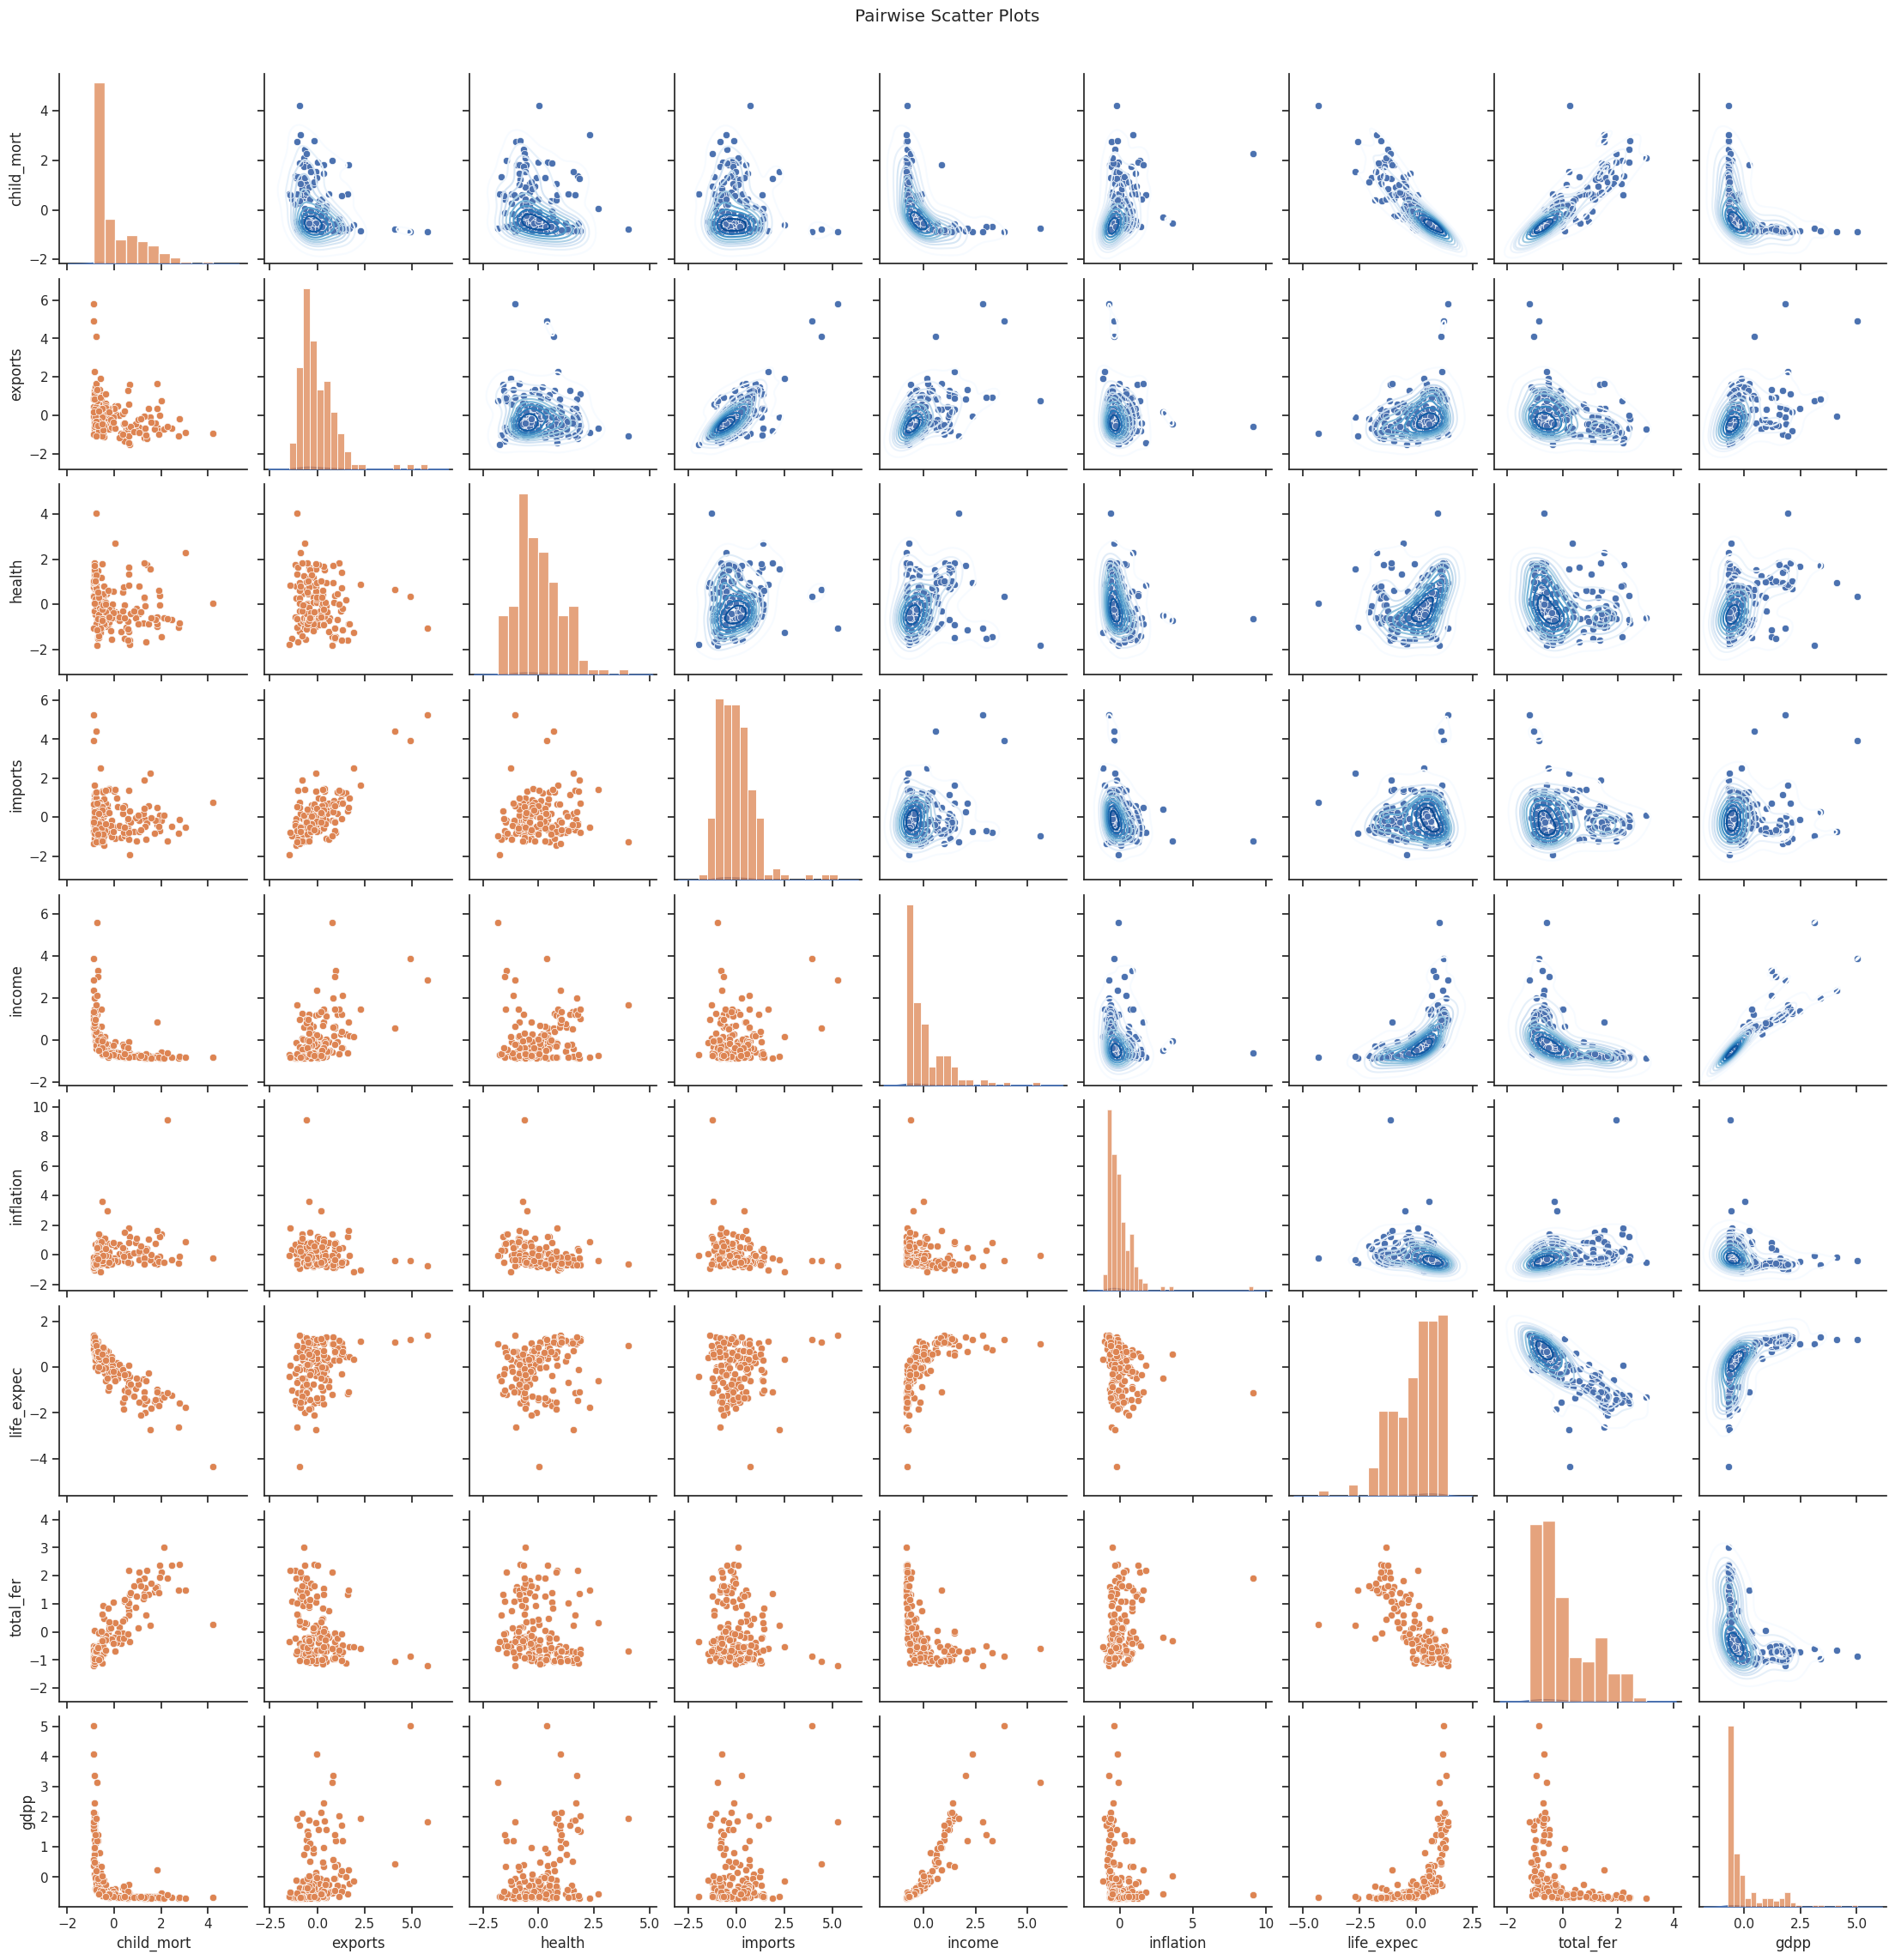

In [15]:
# Select a subset of columns for visualization (optional)
# You can choose the columns you want to include in the pair plot
selected_cols = numerical_cols  # You can modify this list if needed

# Create a pair plot
sns.set(style="ticks")
pair_plot = sns.pairplot(df_scaled1[selected_cols], diag_kind='kde', markers='o')

# Customize the pair plot (optional)
pair_plot.fig.suptitle("Pairwise Scatter Plots", y=1.02)
pair_plot.map_upper(sns.kdeplot, cmap='Blues')
pair_plot.map_lower(sns.scatterplot)
pair_plot.map_diag(sns.histplot, kde_kws={'color': 'k'})

# Show the pair plot
plt.show()

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

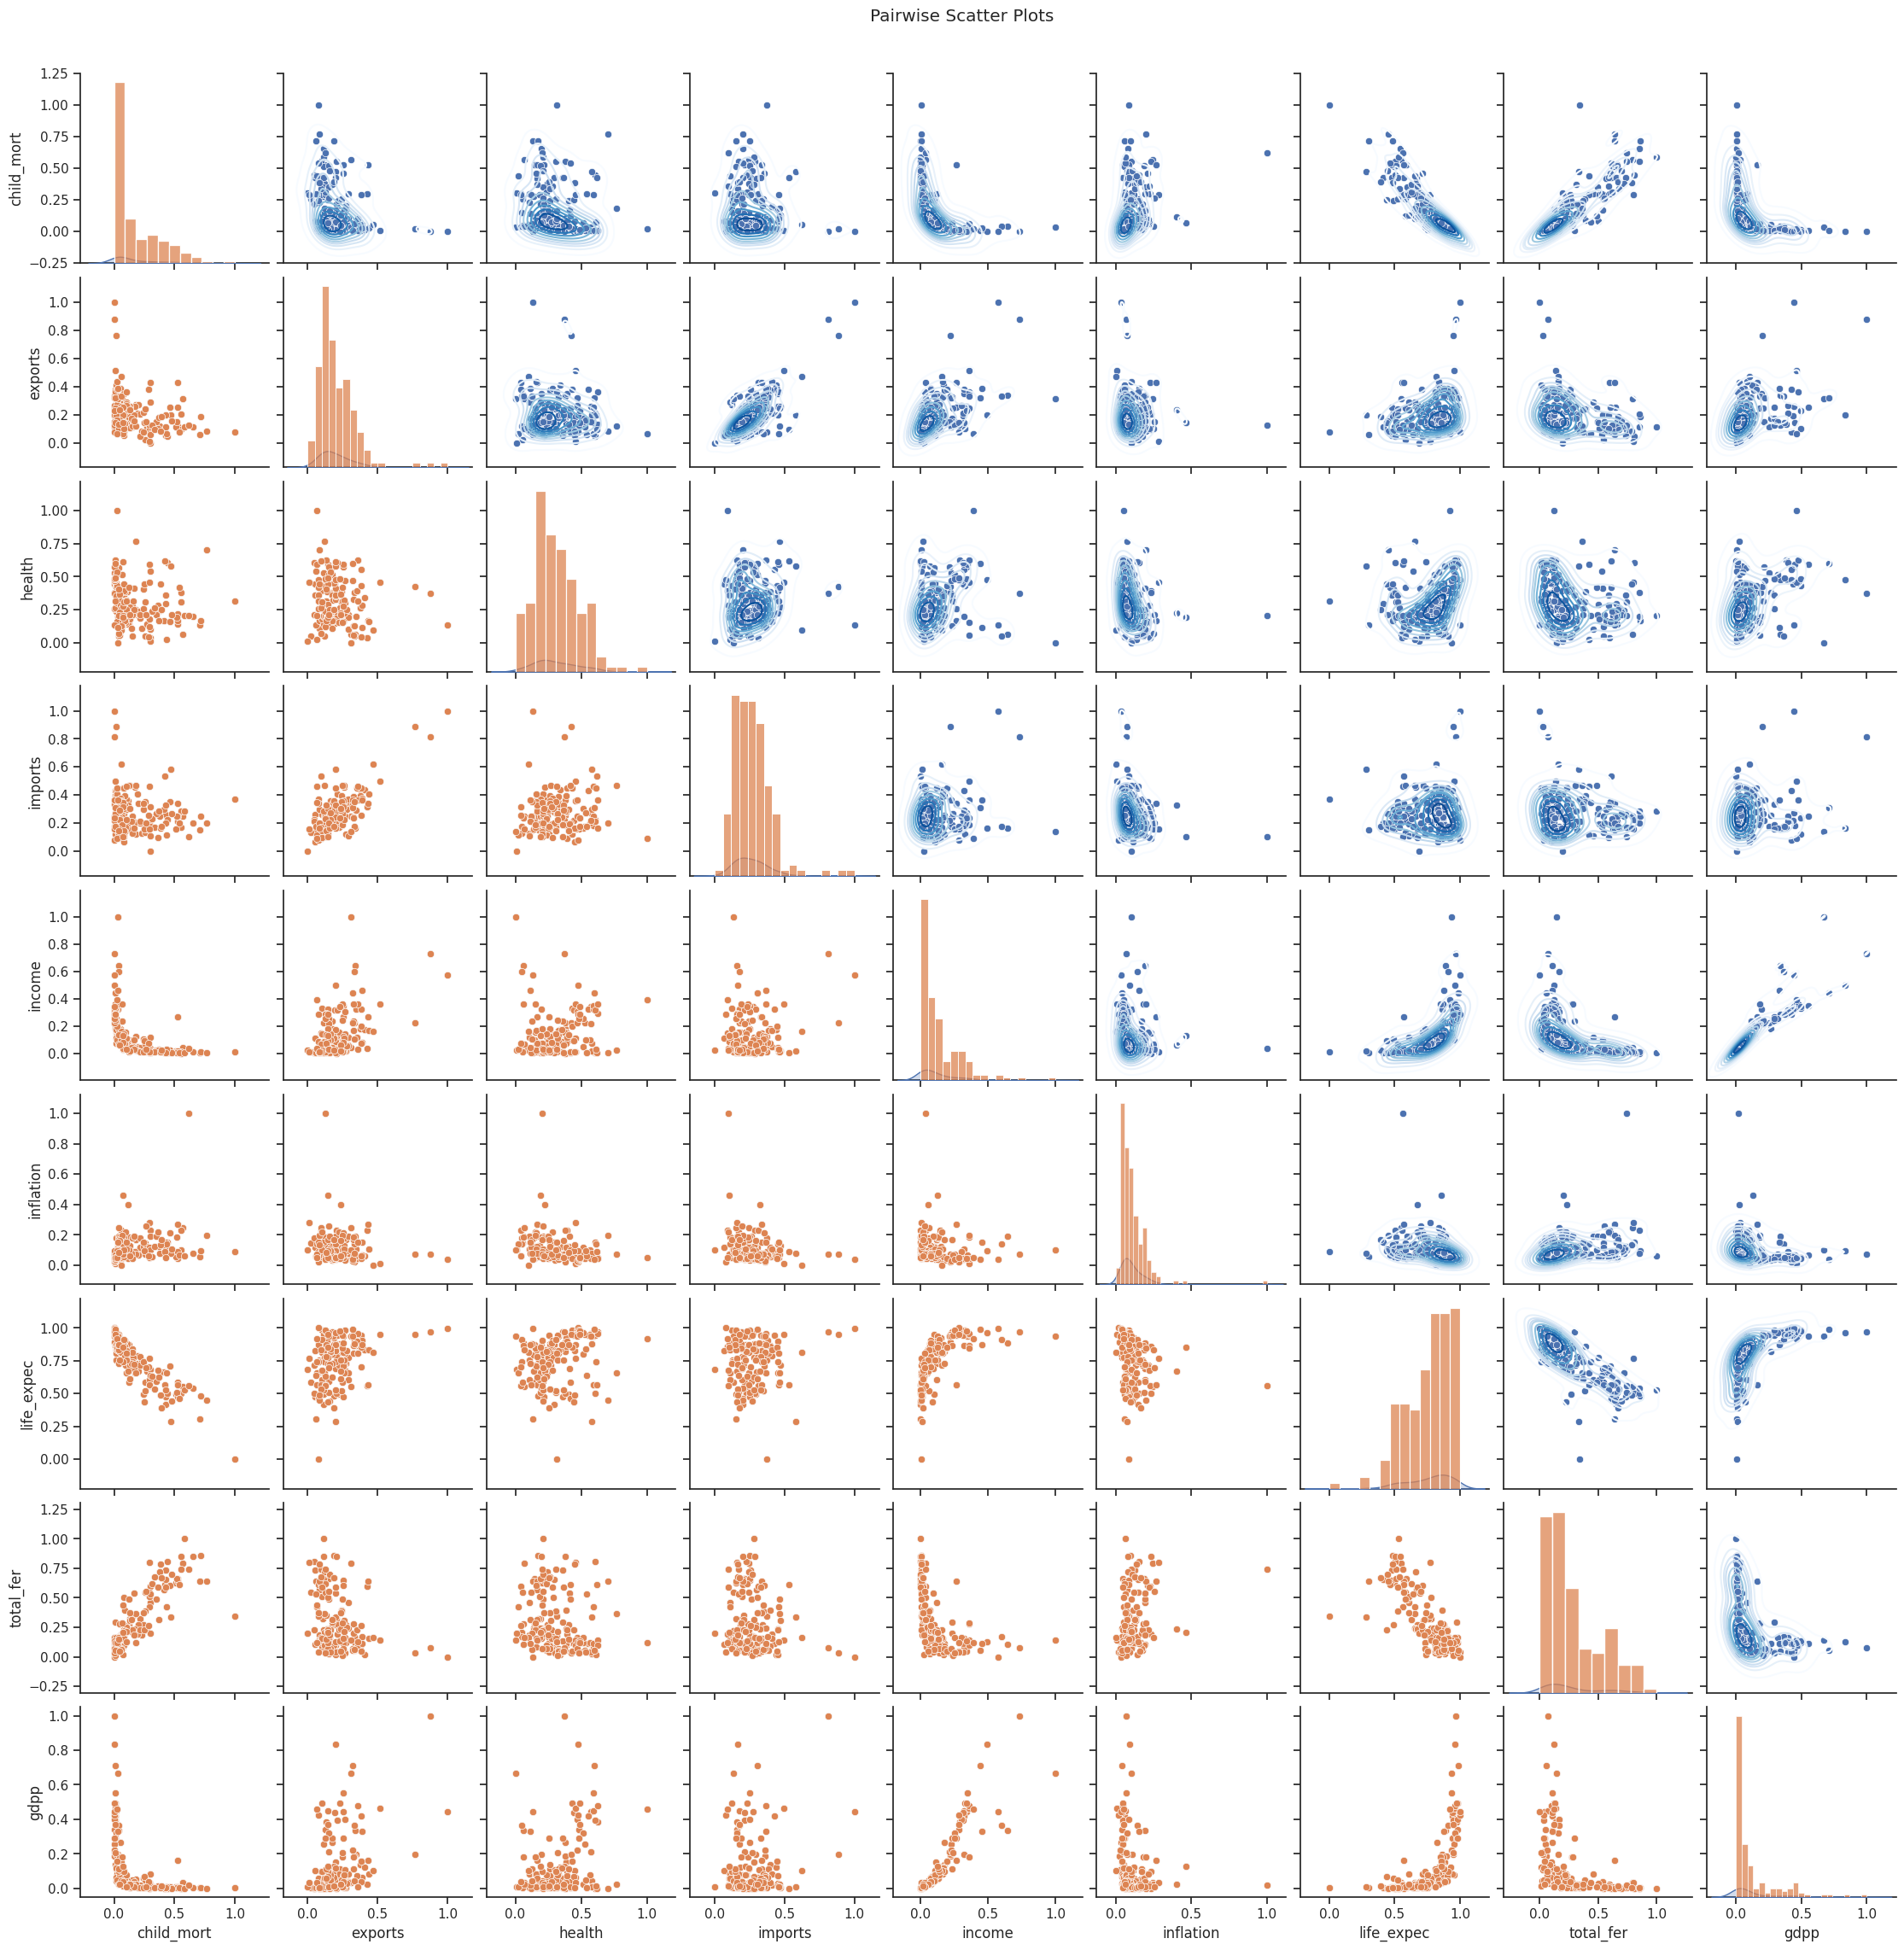

In [16]:
# Select a subset of columns for visualization (optional)
# You can choose the columns you want to include in the pair plot
selected_cols = numerical_cols  # You can modify this list if needed

# Create a pair plot
sns.set(style="ticks")
pair_plot = sns.pairplot(df_scaled2[selected_cols], diag_kind='kde', markers='o')

# Customize the pair plot (optional)
pair_plot.fig.suptitle("Pairwise Scatter Plots", y=1.02)
pair_plot.map_upper(sns.kdeplot, cmap='Blues')
pair_plot.map_lower(sns.scatterplot)
pair_plot.map_diag(sns.histplot, kde_kws={'color': 'k'})

# Show the pair plot
plt.show()

The pair plot will create scatter plots for all possible pairs of numerical columns, making it easy to visualize relationships between variables. It's also useful for identifying potentially strong correlations or patterns between variables.

In [17]:
import scipy.cluster.hierarchy as sch

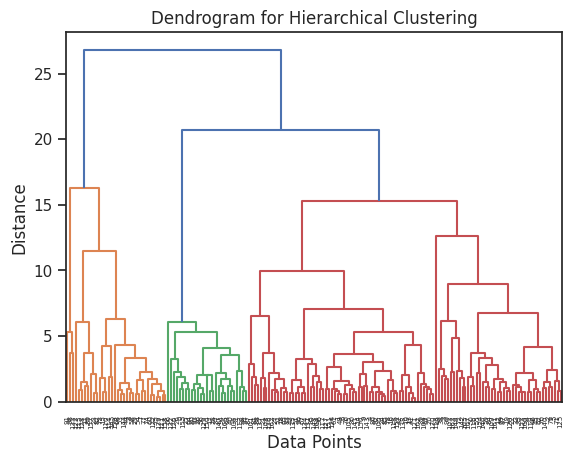

In [18]:
# Assuming 'df' is your DataFrame and 'numerical_cols' contains the numeric column names
numeric_df = df_scaled1[numerical_cols]

# You can choose the linkage method and distance metric based on your analysis goals
linkage_method = 'ward'  # You can try other methods like 'single', 'complete', 'average', etc.
distance_metric = 'euclidean'  # You can choose other distance metrics

# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(numeric_df, method=linkage_method, metric=distance_metric))

# Customize the dendrogram (optional)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

The dendrogram generated from hierarchical clustering represents a tree-like structure that visually displays the hierarchy of clusters in your data. Each level of the tree represents a different stage of cluster merging or splitting, and the branches of the tree show how data points or clusters are grouped together. Here's what the components of a dendrogram typically mean:

    Leaves: The individual data points in your dataset are represented as leaves at the bottom of the dendrogram. In your case, each leaf might represent a country.

    Internal Nodes: These nodes represent clusters or groups of data points. Internal nodes can be created when two or more clusters or data points are merged together.

    Height (Distance): The vertical lines connecting nodes have lengths, which represent the distance at which clusters were merged. Longer lines indicate larger distances, and shorter lines indicate smaller distances. The choice of linkage method (e.g., Ward, single, complete) and distance metric (e.g., Euclidean, Manhattan) affects how distances are calculated.

    Branches and Connections: The branches of the dendrogram connect nodes at different levels of the hierarchy. The structure of these branches reveals how the clusters were formed during the hierarchical clustering process.

    Cutoff Threshold: You can choose a cutoff threshold by drawing a horizontal line through the dendrogram. This line determines how many clusters you want to create. The number of clusters corresponds to the number of branches the line crosses. A higher threshold results in fewer clusters (larger groups), while a lower threshold creates more clusters (smaller groups).

Interpreting a dendrogram involves examining the tree structure to determine the natural clusters within your data. Here are some common strategies for interpreting dendrograms:

    Cluster Identification: Look for natural divisions in the dendrogram where the branches form distinct clusters. Each branch below a division represents a separate cluster.

    Height Threshold: Decide on a height threshold that creates an appropriate number of clusters for your analysis. This depends on your specific goals and the structure of your data.

    Cutting the Dendrogram: You can cut the dendrogram at a specific height to form clusters. This is often done to create a certain number of clusters.

    Subcluster Analysis: If you notice a hierarchical structure with multiple levels in the dendrogram, you can explore subclusters within larger clusters.

    Agglomerative vs. Divisive: Depending on the hierarchical clustering method used (agglomerative or divisive), the dendrogram may start with individual data points and form clusters (agglomerative) or begin with all data points as one cluster and divide them into smaller clusters (divisive).

The interpretation of a dendrogram can be subjective, and the choice of clusters depends on your analysis goals and the context of your data. The dendrogram provides a visual guide to help you make informed decisions about the number and structure of clusters in your data.

In [19]:
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

# Clustering plan:

### Step 1: Cluster Analysis:

Perform cluster analysis using appropriate clustering algorithms (e.g., K-Means, Hierarchical Clustering, DBSCAN) on the preprocessed data. This step aims to identify clusters or groups of similar data points based on feature similarity.

### Step 2: Cluster Visualization and Interpretation:

Visualize the clusters using scatter plots, cluster centers, or other visualization techniques. Analyze the characteristics of each cluster and try to interpret what each cluster represents in the context of your data.

### Step 3: Feature Engineering (if needed):

Based on the insights gained from clustering, you can consider feature engineering steps, such as creating new features based on cluster assignments or cluster-specific statistics.

### Step 4: Model Building and Evaluation:

After clustering and potential feature engineering, you can proceed with building machine learning models. The cluster assignments can serve as additional features or labels for your models, allowing you to explore how clustering information impacts model performance.

In [48]:
from sklearn.cluster import KMeans

# Fit K-Means for different K values
k_values = [2, 3, 5, 7]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled1[['exports', 'imports']])  # Adjust features as needed
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    
    # Calculate cluster densities (e.g., number of data points per cluster)
    cluster_densities = [sum(cluster_labels == i) for i in range(k)]
    
    # Calculate cluster variances (e.g., within-cluster variance)
    cluster_variances = [sum(((df_scaled1[['exports', 'imports']][cluster_labels == i] - cluster_centers[i])**2).sum(axis=1)) for i in range(k)]
    
    print(f"K = {k}")
    print("Cluster Densities:", cluster_densities)
    print("Cluster Variances:", cluster_variances)
    print(f"Cluster assignments for K={k}:")
    for cluster_id in range(k):
        cluster_countries = df_scaled1['country'][cluster_labels == cluster_id].tolist()
        print(f"\tCluster {cluster_id + 1}: {', '.join(cluster_countries)}")
    print("\n")


K = 2
Cluster Densities: [42, 125]
Cluster Variances: [115.38217752881104, 72.8256006266866]
Cluster assignments for K=2:
	Cluster 1: Bahrain, Belarus, Belgium, Belize, Bhutan, Cambodia, Congo, Rep., Cyprus, Czech Republic, Equatorial Guinea, Estonia, Fiji, Guyana, Hungary, Ireland, Jordan, Kyrgyz Republic, Latvia, Lesotho, Liberia, Lithuania, Luxembourg, Malaysia, Maldives, Malta, Mauritania, Mauritius, Micronesia, Fed. Sts., Moldova, Namibia, Netherlands, Panama, Seychelles, Singapore, Slovak Republic, Slovenia, Solomon Islands, Switzerland, Thailand, Turkmenistan, United Arab Emirates, Vietnam
	Cluster 2: Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahamas, Bangladesh, Barbados, Benin, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Brunei, Bulgaria, Burkina Faso, Burundi, Cameroon, Canada, Cape Verde, Central African Republic, Chad, Chile, China, Colombia, Comoros, Congo, Dem. Rep., Costa Rica, Cote d'Ivoire, Cr

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

#### K-Means Clustering:

Recommendation: K-Means is a widely used clustering algorithm that works well when you have a clear expectation of the number of clusters (K) in your data. It's computationally efficient and can handle large datasets.

Use Cases: K-Means is suitable when the clusters are approximately spherical and have similar sizes. It's commonly used for customer segmentation, image compression, and document clustering.

Assessing whether your dataset is approximately spherical for K-Means Clustering is a useful consideration. While K-Means is effective for spherical or isotropic clusters, it may not perform well on non-spherical or elongated clusters. Here are some steps to help you evaluate whether K-Means is suitable for your dataset:

    Visual Inspection: Start by creating scatter plots or visualizations of your data to get a sense of the cluster shapes. Look for clusters that appear roughly spherical in shape. Spherical clusters are more likely to be well-suited for K-Means.

    Cluster Density and Variance: Consider the density and variance of clusters. Spherical clusters typically have similar densities and variances. If clusters have similar densities and are not significantly elongated, K-Means is more likely to work well.

    Elbow Method: Use the elbow method to determine an appropriate number of clusters (K). Plot the within-cluster sum of squares (WCSS) as a function of K and look for an "elbow" point. If you observe a clear elbow in the plot, it suggests that K-Means may be appropriate for your data. An elbow indicates that the clusters are reasonably spherical.

    Silhouette Score: Compute the silhouette score for different values of K. The silhouette score measures how similar data points within the same cluster are compared to data points in different clusters. Higher silhouette scores indicate better clustering. If you obtain high silhouette scores for an optimal K value, it suggests that K-Means can form well-separated, approximately spherical clusters.

    Domain Knowledge: Consider any domain-specific knowledge about your data. If you have prior knowledge that the clusters should be spherical or if there is a theoretical reason to believe they should be, K-Means may be appropriate.

    Experimentation: Perform a preliminary clustering using K-Means with different K values and examine the resulting clusters. Visualize the clusters and assess whether they align with your expectations of spherical clusters.

It's important to note that K-Means can still produce meaningful results on non-spherical data, but the quality of clustering may vary. If your data contains elongated or irregularly shaped clusters, other clustering algorithms like DBSCAN or Gaussian Mixture Models (GMM) might be more appropriate.

In practice, it's a good idea to experiment with different clustering algorithms and evaluate their performance using appropriate metrics to determine which algorithm works best for your specific dataset and analysis goals.

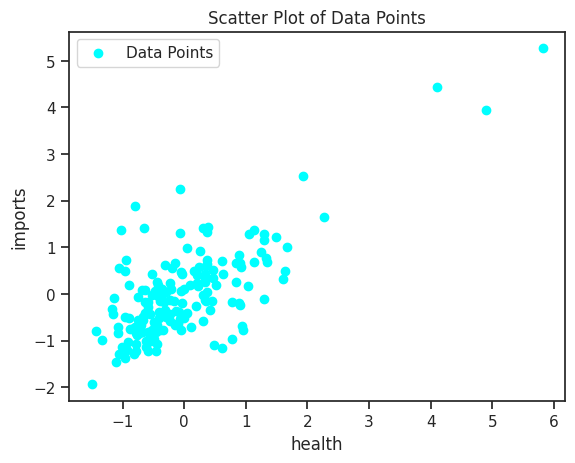

In [45]:
# Create scatter plot for two relevant features (e.g., features 1 and 2)
plt.scatter(df_scaled1['exports'],df_scaled1['imports'], c='cyan', label='Data Points')
plt.title('Scatter Plot of Data Points')
plt.xlabel('health')
plt.ylabel('imports')
plt.legend()
plt.show()

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

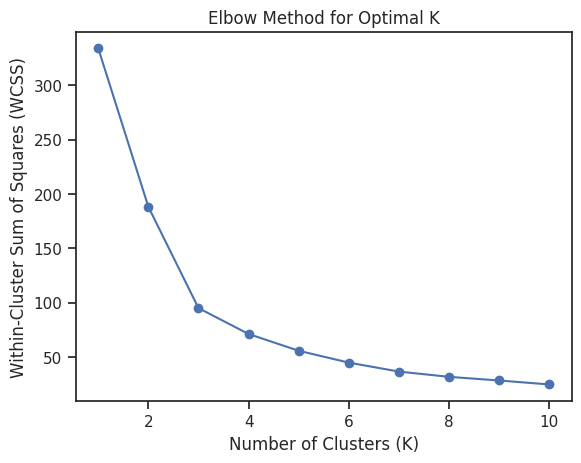

In [22]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled1[['exports', 'imports']])  # Adjust features as needed
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

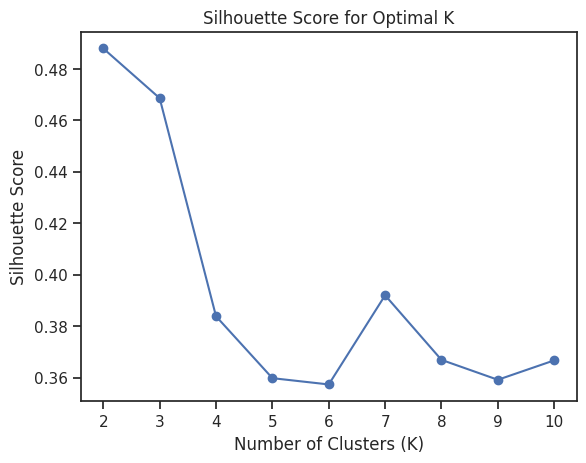

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df_scaled1[['exports', 'imports']])  # Adjust features as needed
    silhouette_scores.append(silhouette_score(df_scaled1[['exports', 'imports']], cluster_labels))

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [24]:
# Define the number of clusters (K)
K = 2  # Replace with your chosen K value

# Create a K-Means model
kmeans = KMeans(n_clusters=K, random_state=0)

# Fit the model to your data (use relevant feature columns)
feature_columns = ['exports', 'imports']  # Adjust based on your dataset
kmeans.fit(df_scaled1[feature_columns])

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_


/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


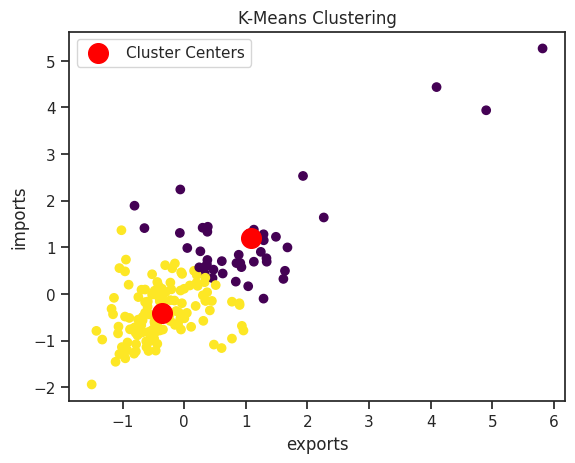

In [25]:
# Create scatter plot for two relevant features (e.g., features 1 and 2)
plt.scatter(df_scaled1['exports'], df_scaled1['imports'], c=cluster_labels, cmap='viridis')  # Adjust features as needed
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('exports')
plt.ylabel('imports')
plt.legend()
plt.show()

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


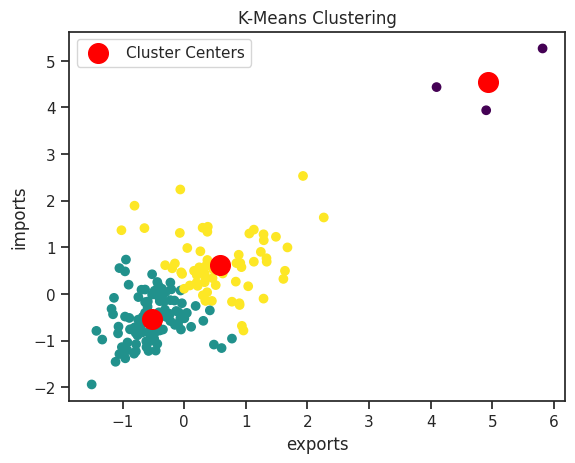

In [26]:
# Define the number of clusters (K)
K = 3  # Replace with your chosen K value

# Create a K-Means model
kmeans = KMeans(n_clusters=K, random_state=0)

# Fit the model to your data (use relevant feature columns)
feature_columns = ['exports', 'imports']  # Adjust based on your dataset
kmeans.fit(df_scaled1[feature_columns])

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Create scatter plot for two relevant features (e.g., features 1 and 2)
plt.scatter(df_scaled1['exports'], df_scaled1['imports'], c=cluster_labels, cmap='viridis')  # Adjust features as needed
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('exports')
plt.ylabel('imports')
plt.legend()
plt.show()

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


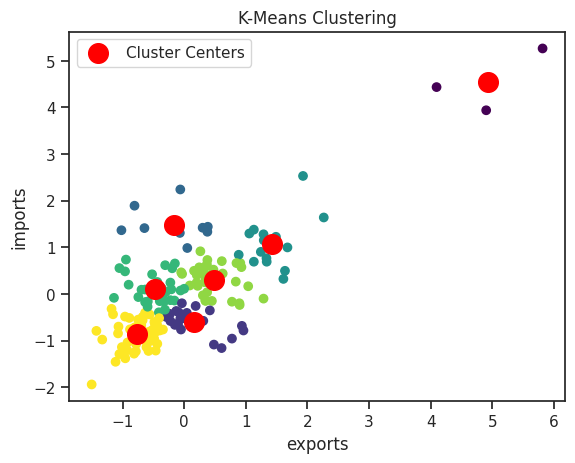

In [27]:
# Define the number of clusters (K)
K = 7  # Replace with your chosen K value

# Create a K-Means model
kmeans = KMeans(n_clusters=K, random_state=0)

# Fit the model to your data (use relevant feature columns)
feature_columns = ['exports', 'imports']  # Adjust based on your dataset
kmeans.fit(df_scaled1[feature_columns])

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Create scatter plot for two relevant features (e.g., features 1 and 2)
plt.scatter(df_scaled1['exports'], df_scaled1['imports'], c=cluster_labels, cmap='viridis')  # Adjust features as needed
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('exports')
plt.ylabel('imports')
plt.legend()
plt.show()

Another example

In [49]:
# Fit K-Means for different K values
k_values = [2, 3, 4, 5, 6]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled1[['child_mort', 'life_expec']])  # Adjust features as needed
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    
    # Calculate cluster densities (e.g., number of data points per cluster)
    cluster_densities = [sum(cluster_labels == i) for i in range(k)]
    
    # Calculate cluster variances (e.g., within-cluster variance)
    cluster_variances = [sum(((df_scaled1[['child_mort', 'life_expec']][cluster_labels == i] - cluster_centers[i])**2).sum(axis=1)) for i in range(k)]
    
    print(f"K = {k}")
    print("Cluster Densities:", cluster_densities)
    print("Cluster Variances:", cluster_variances)
    for cluster_id in range(k):
        cluster_countries = df_scaled1['country'][cluster_labels == cluster_id].tolist()
        print(f"\tCluster {cluster_id + 1}: {', '.join(cluster_countries)}")
    print("\n")


K = 2
Cluster Densities: [120, 47]
Cluster Variances: [47.41455447193472, 53.271748642063706]
	Cluster 1: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Brunei, Bulgaria, Cambodia, Canada, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, Denmark, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Finland, France, Georgia, Germany, Greece, Grenada, Guatemala, Guyana, Hungary, Iceland, Indonesia, Iran, Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kuwait, Kyrgyz Republic, Latvia, Lebanon, Libya, Lithuania, Luxembourg, Macedonia, FYR, Malaysia, Maldives, Malta, Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro, Morocco, Nepal, Netherlands, New Zealand, Norway, Oman, Panama, Paraguay, Peru, Philippines, Poland, Portugal, Qatar, Romania, Russia, Samoa, Saud

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

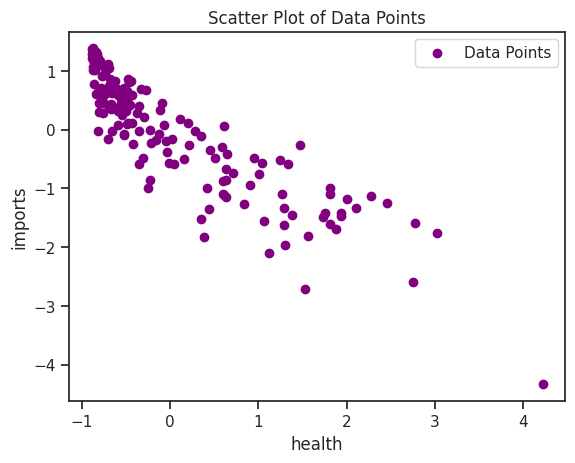

In [28]:
# Create scatter plot for two relevant features (e.g., features 1 and 2)
plt.scatter(df_scaled1['child_mort'],df_scaled1['life_expec'], c='purple', label='Data Points')
plt.title('Scatter Plot of Data Points')
plt.xlabel('health')
plt.ylabel('imports')
plt.legend()
plt.show()

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

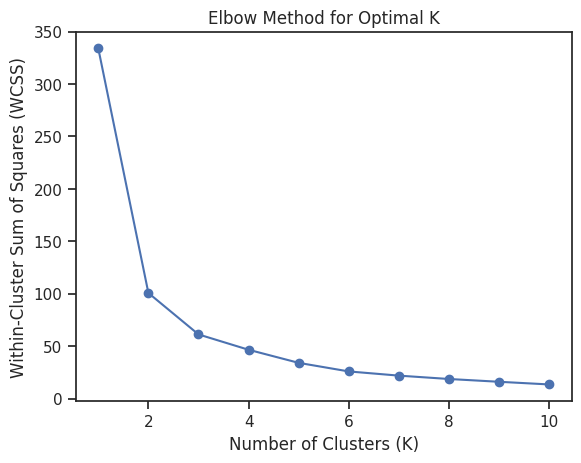

In [30]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled1[['child_mort', 'life_expec']])  # Adjust features as needed
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

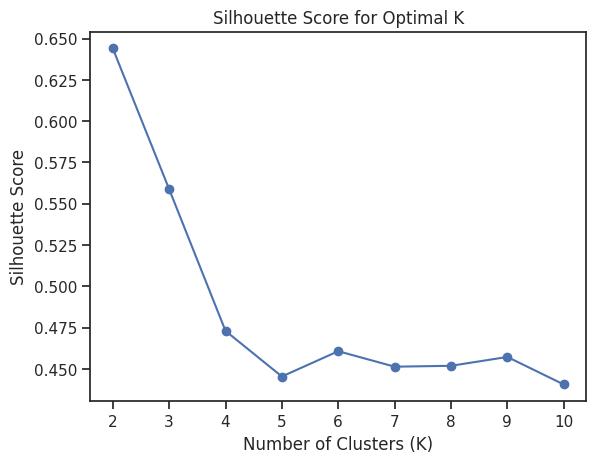

In [31]:
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df_scaled1[['child_mort', 'life_expec']])  # Adjust features as needed
    silhouette_scores.append(silhouette_score(df_scaled1[['child_mort', 'life_expec']], cluster_labels))

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


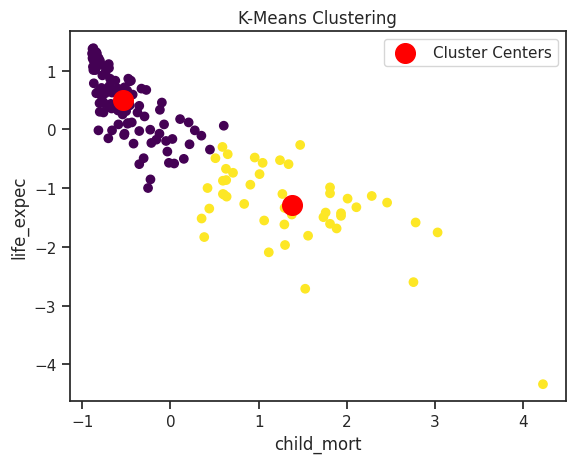

In [32]:
# Define the number of clusters (K)
K = 2  # Replace with your chosen K value

# Create a K-Means model
kmeans = KMeans(n_clusters=K, random_state=0)

# Fit the model to your data (use relevant feature columns)
feature_columns = ['child_mort', 'life_expec']  # Adjust based on your dataset
kmeans.fit(df_scaled1[feature_columns])

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Create scatter plot for two relevant features (e.g., features 1 and 2)
plt.scatter(df_scaled1['child_mort'], df_scaled1['life_expec'], c=cluster_labels, cmap='viridis')  # Adjust features as needed
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('child_mort')
plt.ylabel('life_expec')
plt.legend()
plt.show()

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


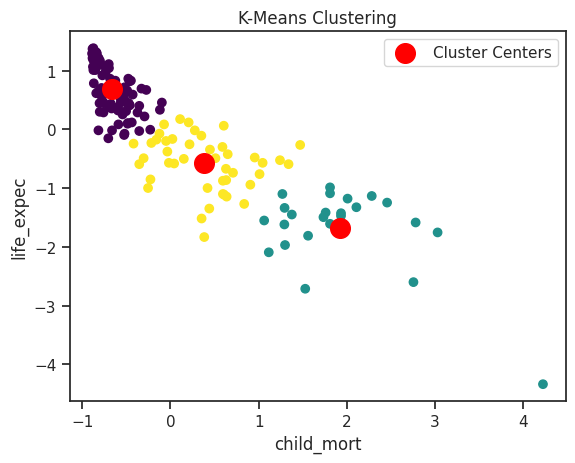

In [33]:
# Define the number of clusters (K)
K = 3  # Replace with your chosen K value

# Create a K-Means model
kmeans = KMeans(n_clusters=K, random_state=0)

# Fit the model to your data (use relevant feature columns)
feature_columns = ['child_mort', 'life_expec']  # Adjust based on your dataset
kmeans.fit(df_scaled1[feature_columns])

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Create scatter plot for two relevant features (e.g., features 1 and 2)
plt.scatter(df_scaled1['child_mort'], df_scaled1['life_expec'], c=cluster_labels, cmap='viridis')  # Adjust features as needed
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('child_mort')
plt.ylabel('life_expec')
plt.legend()
plt.show()

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


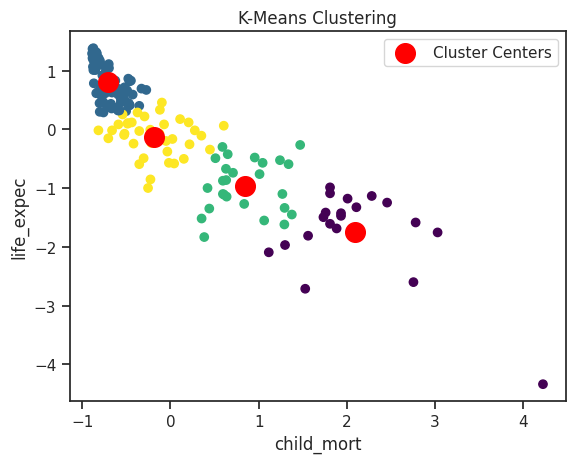

In [34]:
# Define the number of clusters (K)
K = 4  # Replace with your chosen K value

# Create a K-Means model
kmeans = KMeans(n_clusters=K, random_state=0)

# Fit the model to your data (use relevant feature columns)
feature_columns = ['child_mort', 'life_expec']  # Adjust based on your dataset
kmeans.fit(df_scaled1[feature_columns])

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Create scatter plot for two relevant features (e.g., features 1 and 2)
plt.scatter(df_scaled1['child_mort'], df_scaled1['life_expec'], c=cluster_labels, cmap='viridis')  # Adjust features as needed
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('child_mort')
plt.ylabel('life_expec')
plt.legend()
plt.show()

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


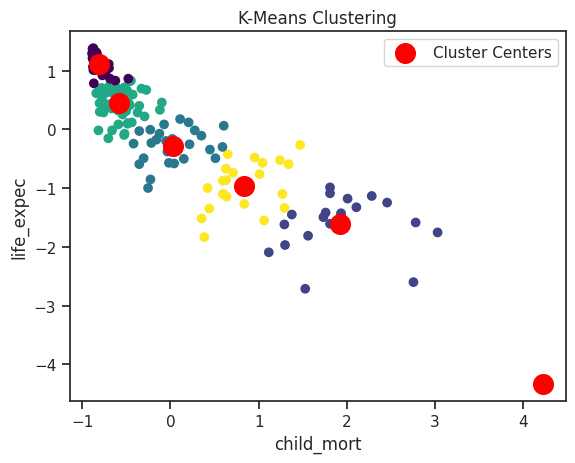

In [35]:
# Define the number of clusters (K)
K = 6  # Replace with your chosen K value

# Create a K-Means model
kmeans = KMeans(n_clusters=K, random_state=0)

# Fit the model to your data (use relevant feature columns)
feature_columns = ['child_mort', 'life_expec']  # Adjust based on your dataset
kmeans.fit(df_scaled1[feature_columns])

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Create scatter plot for two relevant features (e.g., features 1 and 2)
plt.scatter(df_scaled1['child_mort'], df_scaled1['life_expec'], c=cluster_labels, cmap='viridis')  # Adjust features as needed
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('child_mort')
plt.ylabel('life_expec')
plt.legend()
plt.show()

Hierarchical clustering is a flexible and informative clustering method, and the choice of linkage method and metric may significantly impact the clustering results.

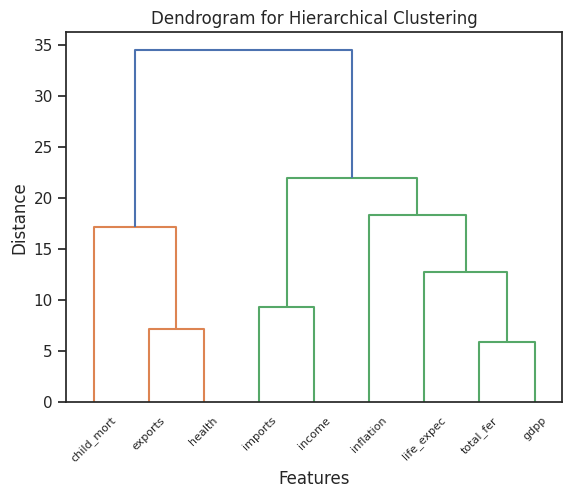

In [36]:
numeric_df = df_scaled1[numerical_cols]

# You can choose the linkage method and distance metric based on your analysis goals
linkage_method = 'ward'  # You can try other methods like 'single', 'complete', 'average', etc.
distance_metric = 'euclidean'  # You can choose other distance metrics

# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(numeric_df.T, method=linkage_method, metric=distance_metric))

# Customize the dendrogram
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Features')
plt.ylabel('Distance')

# Rotate and adjust font size of the labels
plt.xticks(rotation=45, fontsize=8)  # Rotate labels 45 degrees and set font size

# Display column names as labels
column_names = list(numeric_df.columns)
ax = plt.gca()
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks, labels=column_names)

plt.show()


In [37]:
from sklearn.cluster import AgglomerativeClustering

/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Figure size 1000x500 with 0 Axes>

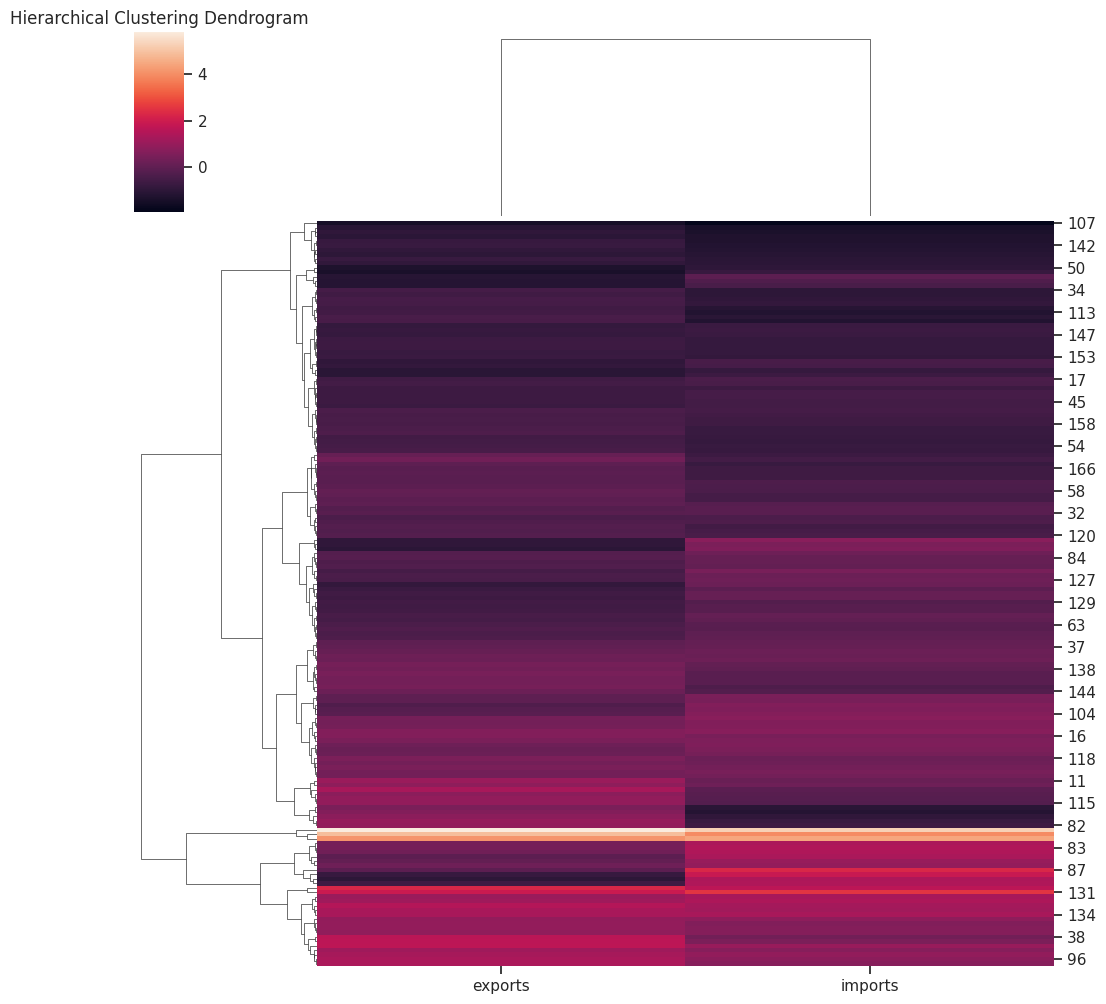

In [38]:
# Create a linkage matrix for hierarchical clustering (use appropriate method and metric)
# The linkage method and metric depend on your data; 'ward' and 'euclidean' are common choices.
linkage_method = 'ward'
linkage_metric = 'euclidean'

# Create a hierarchical clustering model
n_clusters = 2  # Choose the number of clusters
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, affinity=linkage_metric)

# Fit the model to your data (use relevant feature columns)
feature_columns = ['exports', 'imports']
  # Adjust based on your dataset
hc_labels = hc.fit_predict(df_scaled1[feature_columns])

# Visualize the hierarchical clustering using a dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sns.clustermap(df_scaled1[feature_columns], method=linkage_method, metric=linkage_metric)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


/home/jjfigpad/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Figure size 1000x500 with 0 Axes>

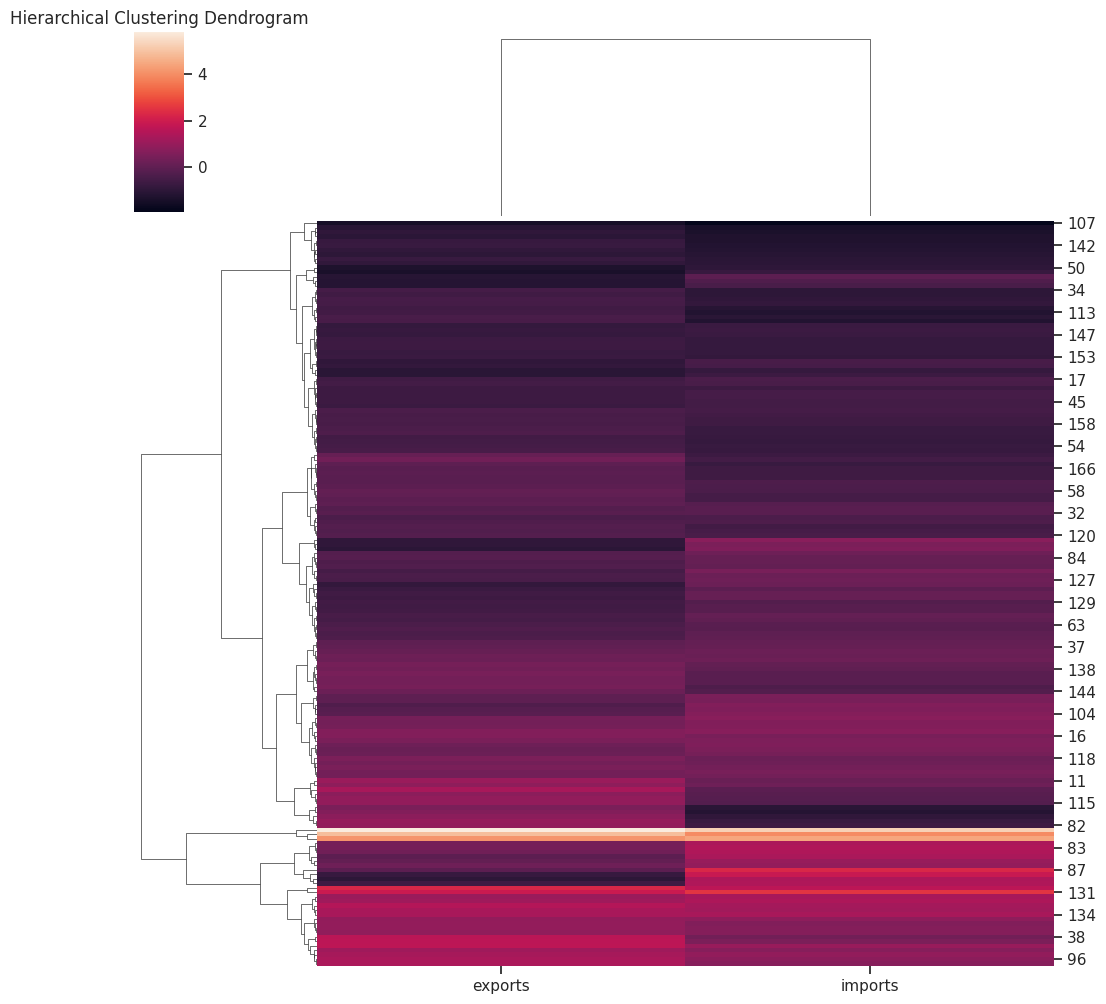

In [50]:
# Create a linkage matrix for hierarchical clustering (use appropriate method and metric)
# The linkage method and metric depend on your data; 'ward' and 'euclidean' are common choices.
linkage_method = 'ward'
linkage_metric = 'euclidean'

# Create a hierarchical clustering model
n_clusters = 3  # Choose the number of clusters
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, affinity=linkage_metric)

# Fit the model to your data (use relevant feature columns)
feature_columns = ['exports', 'imports']
  # Adjust based on your dataset
hc_labels = hc.fit_predict(df_scaled1[feature_columns])

# Visualize the hierarchical clustering using a dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sns.clustermap(df_scaled1[feature_columns], method=linkage_method, metric=linkage_metric)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


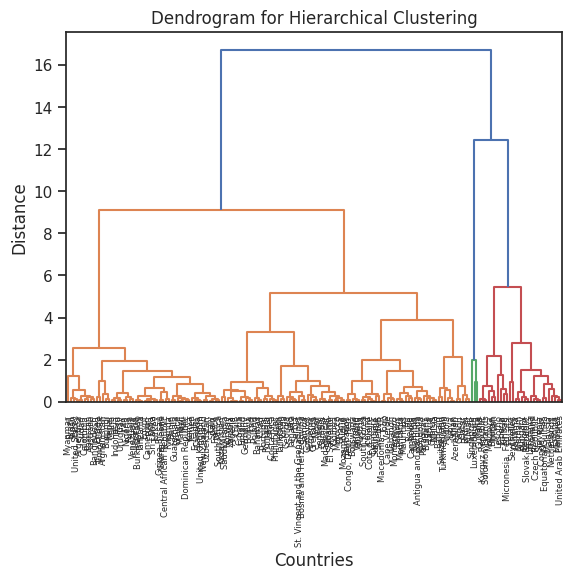

In [51]:
numeric_df = df_scaled1[['exports', 'imports']]
country_names = df['country']

# You can choose the linkage method and distance metric based on your analysis goals
linkage_method = 'ward'  # You can try other methods like 'single', 'complete', 'average', etc.
distance_metric = 'euclidean'  # You can choose other distance metrics

# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(numeric_df, method=linkage_method, metric=distance_metric),
                            labels=country_names.values,  # Specify country names as labels
                            orientation='top',  # Show labels at the top of the dendrogram
                            leaf_rotation=90,  # Rotate labels for better readability
                            leaf_font_size=6)  # Adjust font size for leaf labels

# Customize the dendrogram (optional)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

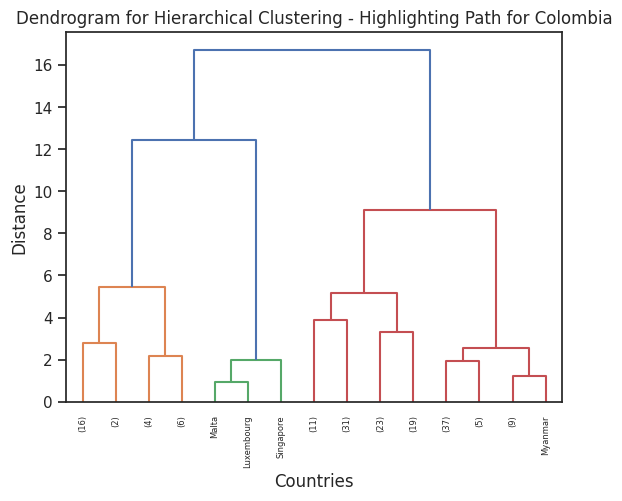

In [82]:
# Assuming 'df' is your DataFrame, and 'country' is the column with country names
numeric_df = df_scaled1[['exports', 'imports']]
country_names = df['country'].tolist()  # Convert country names to a list

# Choose the linkage method and distance metric based on your analysis goals
linkage_method = 'ward'  # You can try other methods like 'single', 'complete', 'average', etc.
distance_metric = 'euclidean'  # You can choose other distance metrics

# Perform hierarchical clustering
result = sch.linkage(numeric_df, method=linkage_method, metric=distance_metric)
dendrogram = sch.dendrogram(result,p=3,truncate_mode='level',
                            labels=country_names,  # Specify country names as labels
                            orientation='top',  # Show labels at the top of the dendrogram
                            leaf_rotation=90,  # Rotate labels for better readability
                            leaf_font_size=6,  # Adjust font size for leaf labels
                            distance_sort='descending')  # Sort distances in descending order

# Customize the dendrogram (optional)
plt.title(f'Dendrogram for Hierarchical Clustering - Highlighting Path for Colombia')
plt.xlabel('Countries')
plt.ylabel('Distance')

plt.show()
